# 기술통계

1. 1차원(1변수) 데이터의 수치지표/그래프 표현
2. 2차원(2변수) 데이터의 수치지표/그래프 표현


* 1차원(1변수)데이터의 수치지표<br>

>"대표값" => 데이터를 하나의 값으로 요약한 지표  
> 평균(많이 이용), 중위값, 최댓값, 최솟값  

##### 평균(mean)
* 평균 => 단점 : 이상치에 약함!!  
* 절사평균으로 단점 보완!

##### 중위값(median)
* 중간에 있는 값
* 홀수개 일때는 중간 값, 짝수개 일때는 중간 두개의 값의 평균을 사용

##### 최빈값(mode)
* 가장 많이 등장한 값  
=> numpy는 없지만 pandas는 mode()함수를 가지고 있음!!

##### 산포도(Dispersion)  
=> 데이터가 얼마나, 어떻게 퍼져있는가  

=> **데이터가 흩어져 있는 정도(변산성)** 를 수치로 표현하려면?  
1. 범위(range)  
2. 사분위(Inter Quatire Range)
3. 편차(deviation)
4. 분산(variance)
5. 표준편차(Standard Deviation)
<br>
<br>
* 편차 : 각 데이터가 평균으로부터 어느정도 떨어져있는가에 대한 지표  
=> 구해봤더니!! 값이 여러개임! => 활용하기가 살짝 그시껭이함  
=> 하나의 값을 만들고 싶어서 평균을 구했는데! ㅇ0ㅇ 0이 나오는거 아니겠음?!?!?  
=> 표준편차의 평균은 0이다  
=> 그렇다면 분산을 이용해봅시다!
<br>
<br>
* 분산 : 편차의 제곱의 평균  
=> Numpy와 Pandas가 구해지는 분산이 다름!  
1. 표본분산 : n으로 나눔
2. 불편분산 : n-1로 나눔  
<br>
<br>
* 표준편차 : 분산의 제곱근

##### range(범위)
Rg = Xmax - Xmin  
=> range값이 크면 *산포도* 가 큼  
=> range값이 크면 *산포도* 가 작음  

<br>

##### Interquatile range(사분위 범위)

***

In [1]:
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv('../data/student/student_scores_em.csv',
                 index_col='student number')
print(df.shape)   # (50, 2)
#display(df.head())

# 영어성적을 가지고 있는 Series 생성 (10개의 데이터만 이용)
scores = df['english'][:10]
#scores

# 1변수(1차원)를 가지고 있는 DataFrame을 생성
scores_df = pd.DataFrame(scores)
#display(scores_df)

(50, 2)


In [13]:
# 평균(mean)
print(scores.mean())     # 55.0   Series의 메소드를 이용
print(np.mean(scores))   # 55.0   numpy의 mean 함수를 이용 
print(scores_df.mean())  # 55.0   DataFrame의 메소드를 이용해서 구함 => 결과는 Series로 출력

55.0
55.0
english    55.0
dtype: float64


In [14]:
# 중위값(median)
print(np.median(scores)) # 56.5

56.5


In [15]:
# 최빈값(mode)
print(pd.Series([1, 1, 1, 2, 2, 3]).mode())

0    1
dtype: int64


In [18]:
# 편차(deviation)
deviation = scores - np.mean(scores)
print(deviation)
print(deviation.mean()) # 편차의 평균은 당연히 0임

student number
1    -13.0
2     14.0
3      1.0
4    -14.0
5      2.0
6     -7.0
7     10.0
8     -6.0
9     10.0
10     3.0
Name: english, dtype: float64
0.0


In [28]:
# 분산(variance)
variance = np.mean(deviation ** 2)
print(variance)  # 86.0

## numpy로 구한 놈과 pandas로 구한 놈이 값이 다름!
## 표본분산 / 불편분산 의 차이로 인한 거임
## 통계학에서 기본으로 사용하는 분산은 불편분산이다~

# Pandas => 불편분산
# Numpy => 표본분산
print(np.var(deviation))  # 86.0  numpy 함수 사용   =>  표본 분산
print(scores_df.var()) # 95.555556  DataFrame 모든 column에 대해서 variance를 구함  => 불편 분산

# Pandas는 기본적으로 불편분산인데, 표본분산도 구할 수 있음!
## ddof=0  => 표본분산
## ddof=0  => 불편분산
print(scores_df.var(ddof=0))

86.0
86.0
english    95.555556
dtype: float64
english    86.0
dtype: float64


In [30]:
# 표준편차
print(np.sqrt(np.var(scores))) # 9.273618495495704
print(np.std(scores))  # 9.273618495495704

9.273618495495704
9.273618495495704


In [31]:
# IQR
# 사분위 값을 구하는 Numpy 함수 사용
Q1 = np.percentile(scores, 25)  # 1사분위
Q2 = np.percentile(scores, 50)  # 2사분위 = 중위값 = median
Q3 = np.percentile(scores, 75)  # 3사분위

IQR = Q3 - Q1
print(IQR)

15.0


## 1차원(1변수) 데이터의 시각화
=> 데이터의 분포상태를 그래프/표 로 표현

* 도수분포표
: 데이터 분포 상태를 도표로 확인  
=> 데이터가 취하는 값을 몇개의 구간으로 나누고  
각 구간에 몇개의 데이터가 들어가 있는지 셈


> 0 ~ 10 점 => 구간 **class(계급)**  
> 각 구간(class)에 속한 학생수 => **frequency(도수)**  
> 구간의 폭(10점) => **class interval(계급의 크기)**  
> **계급수(class의 개수)**

> class(계급)
> frequency(도수)
> * class mask(계급값) => class를 값으로 표현 => 중위값(median)이용
> * relative frequency(상대도수) -> 전체 데이터에 대해 해당 class의 도수가 얼마만큼의 비율을 차지하고 있는가
> * cumulative relative frequency(누적상대도수) => 해당 class까지 상대도수의 누적

In [42]:
df = pd.read_csv('../data/student/student_scores_em.csv',
                 index_col='student number')
#print(df.shape)   # (50, 2)
#display(df.head())

# 영어성적을 가지고 있는 ndarray 생성
scores = df['english'].values
#print(scores)

# 특정 구간에 몇개의 데이터가 포함되는지 알려주는 Numpy 함수
freq, tmp = np.histogram(scores, bins=10, range=(0,100))
#print(tmp) # 경계값을 구할 수 있음
#print(freq) # 각 bin안의 도수(frequency)

# DataFrame으로 도수분포표를 표현
# 행 index 만들기
freq_class = [str(i) + '~' + str(i+10) for i in range(0,100,10)]
#print(freq_class)

freq_list_df = pd.DataFrame({'Frequence':freq},
                            index=freq_class)
display(freq_list_df)

,Frequence
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0
90~100,0


In [46]:
df = pd.read_csv('../data/student/student_scores_em.csv',
                 index_col='student number')
#print(df.shape)   # (50, 2)
#display(df.head())

# 영어성적을 가지고 있는 ndarray 생성
scores = df['english'].values
#print(scores)

# 특정 구간에 몇개의 데이터가 포함되는지 알려주는 Numpy 함수
freq, tmp = np.histogram(scores, bins=10, range=(0,100))
#print(tmp) # 경계값을 구할 수 있음
#print(freq) # 각 bin안의 도수(frequency)

# DataFrame으로 도수분포표를 표현
# 행 index 만들기
freq_class = [str(i) + '~' + str(i+10) for i in range(0,100,10)]
#print(freq_class)

freq_list_df = pd.DataFrame({'Frequence':freq},
                            index=freq_class)
display(freq_list_df)

# class mark
class_mark = [(i+(i+10)) / 2 for i in range(0,100,10)]
freq_list_df['class_mark'] = class_mark
display(freq_list_df)

# 상대 도수(relative frequency)
rel_freq = freq / freq.sum()
freq_list_df['rel_freq'] = rel_freq
display(freq_list_df)

# 누적 상대 도수(cumulative relative frequency)
print(np.cumsum(rel_freq))

,Frequence
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0
90~100,0


,Frequence,class_mark
0~10,0,5.0
10~20,0,15.0
20~30,0,25.0
30~40,2,35.0
40~50,8,45.0
50~60,16,55.0
60~70,18,65.0
70~80,6,75.0
80~90,0,85.0
90~100,0,95.0


,Frequence,class_mark,rel_freq
0~10,0,5.0,0.00
10~20,0,15.0,0.00
20~30,0,25.0,0.00
30~40,2,35.0,0.04
40~50,8,45.0,0.16
50~60,16,55.0,0.32
60~70,18,65.0,0.36
70~80,6,75.0,0.12
80~90,0,85.0,0.00
90~100,0,95.0,0.00


[0.   0.   0.   0.04 0.2  0.52 0.88 1.   1.   1.  ]


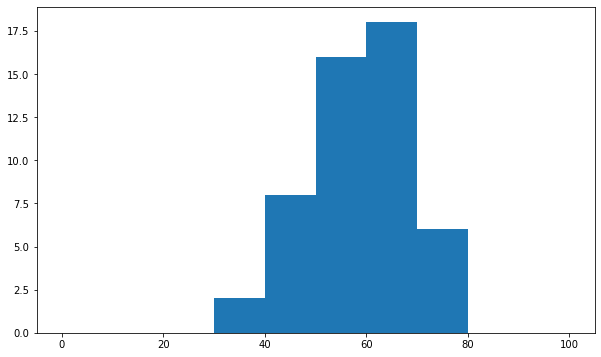

In [48]:
import matplotlib.pyplot as plt

# 1차원 데이터를 이용해서 Histogram 그리기
df = pd.read_csv('../data/student/student_scores_em.csv',
                 index_col='student number')
#print(df.shape)   # (50, 2)
#display(df.head())

# 영어성적을 가지고 있는 ndarray 생성
scores = df['english'].values
#print(scores)

# 그래프 그리기
figure = plt.figure(figsize=(10,6))
ax = figure.add_subplot(1,1,1)
ax.hist(scores, bins=10, range=(0,100))
plt.show()

### Boxplot

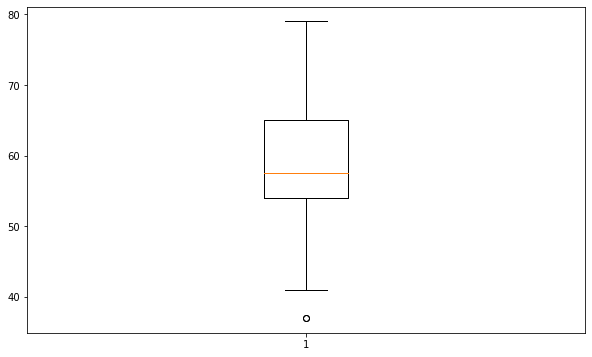

In [49]:
import matplotlib.pyplot as plt

# 1차원 데이터를 이용해서 Histogram 그리기
df = pd.read_csv('../data/student/student_scores_em.csv',
                 index_col='student number')
#print(df.shape)   # (50, 2)
#display(df.head())

# 영어성적을 가지고 있는 ndarray 생성
scores = df['english'].values
#print(scores)

# 그래프 그리기
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.boxplot(scores)
plt.show()

# 기술통계

1. 1차원(1변수) 데이터의 수치지표/그래프 표현
2. 2차원(2변수) 데이터의 수치지표/그래프 표현


* 2차원(1변수)데이터의 수치지표<br>
=> 공분산, 상관계수  
<br>

* 2차원(1변수)데이터의 그래프 표현<br>
=> scatter

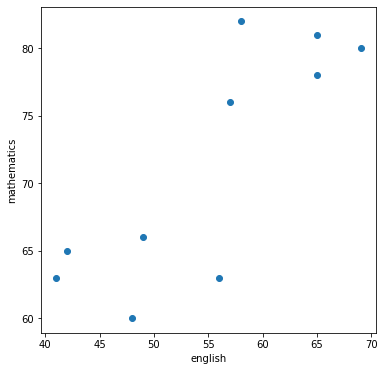

55.0 71.4


In [61]:
import matplotlib.pyplot as plt

# 2차원 데이터!
df = pd.read_csv('../data/student/student_scores_em.csv',
                 index_col='student number')
#print(df.shape)   # (50, 2)
#display(df.head())

en_scores = df['english'][:10]
ma_scores = df['mathematics'][:10]

scores_df = pd.DataFrame({'english':en_scores.values,
                          'mathematics':ma_scores.values},
                         index=['A','B','C','D','E','F','G','H','I','J'])
#display(scores_df)

# scatter 로 그려보자
figure = plt.figure(figsize=(6,6))
ax = figure.add_subplot(1,1,1)

ax.scatter(en_scores, ma_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

# 영어와 수학의 평균을 구해보자
print(en_scores.mean(), ma_scores.mean())   # 55.0  /  71.4
